In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install os
!pip install seaborn
!pip install pandas-profiling

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
cars = pd.read_csv('car.csv')
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [110]:
!pip install pandas-profiling

In [116]:
!pip install ydata-profiling

  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [5]:
cars['model'].value_counts()

model
A3     1929
Q3     1417
A4     1381
A1     1347
A5      882
Q5      877
Q2      822
A6      748
Q7      397
TT      336
A7      122
A8      118
Q8       69
RS6      39
RS3      33
RS4      31
RS5      29
R8       28
S3       18
SQ5      16
S4       12
SQ7       8
S8        4
S5        3
A2        1
RS7       1
Name: count, dtype: int64

In [7]:
value_counts = cars['model'].value_counts()
uncommon_categories = value_counts[value_counts < 100].index

In [8]:
cars['model'] = cars['model'].apply(lambda x: 'uncommon' if x in uncommon_categories else x)

In [11]:
cars.sample(50)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5500,A3,2019,30500,Semi-Auto,266,Petrol,150,34.9,2.0
3124,A6,2019,45912,Automatic,5260,Diesel,145,36.2,3.0
9200,Q3,2013,9000,Manual,108220,Diesel,150,54.3,2.0
5314,Q3,2019,26990,Manual,5000,Diesel,145,42.8,2.0
7260,A4,2016,21990,Semi-Auto,16117,Diesel,145,55.4,3.0
9382,A4,2019,27990,Automatic,3250,Petrol,145,38.7,2.0
4484,A5,2017,22990,Semi-Auto,28500,Diesel,145,65.7,2.0
6752,Q2,2020,25888,Semi-Auto,4000,Petrol,145,42.2,1.5
8387,A7,2018,38880,Automatic,19132,Petrol,150,39.8,3.0
10570,Q5,2019,33000,Automatic,1000,Diesel,145,38.2,2.0


In [12]:
cars.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [14]:
cars.duplicated().sum()

103

In [15]:
cars_n = cars.drop_duplicates(keep='last')

In [16]:
cars_n.duplicated().sum()

0

In [17]:
cars_n.describe()

,year,price,mileage,tax,mpg,engineSize
count,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000
mean,2017.084524,22853.956081,24955.960530,125.909134,50.837558,1.932977
std,2.167309,11723.076767,23448.942551,67.408761,12.963337,0.602902
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19268.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36668.000000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [23]:
cars_n.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


<Axes: xlabel='model', ylabel='price'>

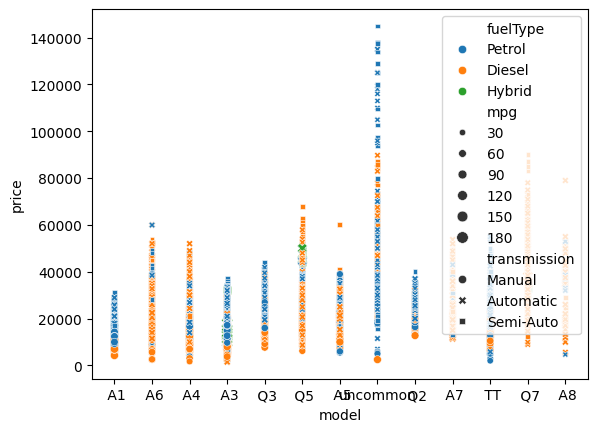

In [29]:
sns.scatterplot(x=cars_n['model'], y=cars['price'],hue = cars_n['fuelType'],style = cars_n['transmission'],size=cars_n['mpg'])

In [98]:
X = cars_n.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)
pd.DataFrame(X)

(10565, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

,0,1,2,3,4,5,6,7
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...
10560,A3,2020,Manual,4018,Petrol,145,49.6,1.0
10561,A3,2020,Manual,1978,Petrol,150,49.6,1.0
10562,A3,2020,Manual,609,Petrol,150,49.6,1.0
10563,Q3,2017,Automatic,8646,Petrol,150,47.9,1.4


In [31]:
Y = cars_n.iloc[:,[2]].values
display (Y.shape)
display (Y)


(10565, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=42)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(10565, 8) (10565, 1)
(8452, 8) (8452, 1)
(2113, 8) (2113, 1)


In [97]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2019,3986,145,47.1,2.0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2017,32310,145,47.9,3.0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2019,4039,145,51.4,1.6
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,2015,35520,260,41.5,3.0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,2016,35285,200,47.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2018,10500,150,60.1,1.0
8448,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2019,3774,145,40.9,2.0
8449,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,2019,8396,145,47.9,1.6
8450,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2020,1500,145,47.9,1.0


In [33]:
transformer = ColumnTransformer(transformers = 
                                [('ohe1',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first',dtype=np.int32),[0,2,4])],
                                remainder = 'passthrough')

In [34]:
X_test = transformer.fit_transform(X_test)
display(X_test.shape)
#display(pd.DataFrame(X))

(2113, 21)

In [35]:
X_train = transformer.fit_transform(X_train)
display(X_train.shape)
#display(pd.DataFrame(X))

(8452, 21)

In [37]:
display(pd.DataFrame(X_test))

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2015,23886,30,65.7,2.0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2017,38810,30,67.3,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2019,2250,145,46.3,1.5
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,2016,46553,30,61.4,2.0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2014,77430,0,74.3,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2016,21968,145,56.5,2.0
2109,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015,74369,30,62.8,2.0
2110,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,2016,18828,260,35.8,3.0
2111,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2019,10189,150,38.2,2.0


In [38]:
display(pd.DataFrame(X_train))

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2019,3986,145,47.1,2.0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2017,32310,145,47.9,3.0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2019,4039,145,51.4,1.6
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,2015,35520,260,41.5,3.0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,2016,35285,200,47.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2018,10500,150,60.1,1.0
8448,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2019,3774,145,40.9,2.0
8449,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,2019,8396,145,47.9,1.6
8450,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2020,1500,145,47.9,1.0


In [39]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)

# transform train and test sets
X_test_scaled = scaler.transform(X_test)

In [40]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.472580,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,2.611261,-0.296266,-0.198048,...,-0.17022,-0.827855,-0.720073,-0.051085,-0.946754,0.880394,-0.890688,0.287686,-0.288161,0.107439
1,-0.472580,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,-0.382957,-0.296266,5.049287,...,-0.17022,-0.827855,-0.720073,-0.051085,-0.946754,-0.048639,0.322786,0.287686,-0.226391,1.758182
2,2.116044,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,-0.382957,-0.296266,-0.198048,...,-0.17022,1.207941,-0.720073,-0.051085,-0.946754,0.880394,-0.888417,0.287686,0.043853,-0.552858
3,-0.472580,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,-0.382957,3.375346,-0.198048,...,-0.17022,-0.827855,1.388748,-0.051085,-0.946754,-0.977672,0.460311,1.995789,-0.720551,1.758182
4,-0.472580,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,-0.382957,-0.296266,5.049287,...,-0.17022,-0.827855,1.388748,-0.051085,-0.946754,-0.513155,0.450243,1.104605,-0.226391,1.758182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,2.116044,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,-0.382957,-0.296266,-0.198048,...,-0.17022,1.207941,-0.720073,-0.051085,1.056241,0.415877,-0.611611,0.361951,0.715601,-1.543304
8448,-0.472580,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,-0.382957,-0.296266,-0.198048,...,-0.17022,-0.827855,1.388748,-0.051085,1.056241,0.880394,-0.899771,0.287686,-0.766878,0.107439
8449,-0.472580,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,3.413604,-0.382957,-0.296266,-0.198048,...,-0.17022,-0.827855,1.388748,-0.051085,-0.946754,0.880394,-0.701752,0.287686,-0.226391,-0.552858
8450,-0.472580,-0.385188,-0.302367,-0.276182,-0.111616,-0.106619,-0.292945,-0.382957,-0.296266,-0.198048,...,-0.17022,1.207941,-0.720073,-0.051085,1.056241,1.344910,-0.997195,0.287686,-0.226391,-1.543304


In [41]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.463752,-0.393249,-0.291992,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,-0.307004,-0.191835,...,-0.1604,1.183696,-0.690355,-0.053363,-0.952386,-0.901730,-0.075064,-1.432868,1.140835,0.126522
1,-0.463752,2.542918,-0.291992,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,-0.307004,-0.191835,...,-0.1604,1.183696,-0.690355,-0.053363,-0.952386,-0.001704,0.550528,-1.432868,1.263833,0.126522
2,-0.463752,-0.393249,-0.291992,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,-0.307004,-0.191835,...,-0.1604,1.183696,-0.690355,-0.053363,1.049994,0.898322,-0.982014,0.265528,-0.350511,-0.719493
3,-0.463752,-0.393249,-0.291992,-0.275437,-0.092692,-0.104904,-0.268411,2.467915,-0.307004,-0.191835,...,-0.1604,1.183696,-0.690355,-0.053363,-0.952386,-0.451717,0.875103,-1.432868,0.810279,0.126522
4,2.156324,-0.393249,-0.291992,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,-0.307004,-0.191835,...,-0.1604,1.183696,-0.690355,-0.053363,-0.952386,-1.351742,2.169423,-1.875928,1.801947,-0.550290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,-0.463752,-0.393249,3.424750,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,-0.307004,-0.191835,...,-0.1604,-0.844811,-0.690355,-0.053363,-0.952386,-0.451717,-0.155464,0.265528,0.433599,0.126522
2109,2.156324,-0.393249,-0.291992,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,-0.307004,-0.191835,...,-0.1604,-0.844811,-0.690355,-0.053363,-0.952386,-0.901730,2.041110,-1.432868,0.917902,0.126522
2110,-0.463752,-0.393249,3.424750,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,-0.307004,-0.191835,...,-0.1604,-0.844811,1.448530,-0.053363,1.049994,-0.451717,-0.287088,1.963925,-1.157683,1.818552
2111,-0.463752,-0.393249,-0.291992,-0.275437,-0.092692,-0.104904,-0.268411,-0.405200,3.257283,-0.191835,...,-0.1604,-0.844811,-0.690355,-0.053363,-0.952386,0.898322,-0.649223,0.339372,-0.973187,0.126522


In [42]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=0)
RFR.fit(X_train_scaled,Y_train)
display (RFR)


C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [44]:
y_pred = RFR.predict(X_test_scaled)
display (pd.DataFrame(y_pred))


,0
0,15328.200000
1,16476.570000
2,20546.750000
3,15692.190000
4,7965.510000
...,...
2108,19254.010000
2109,11548.020000
2110,24283.710000
2111,33051.000000


In [45]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[15328.2        16499.        ]
 [16476.57       17012.        ]
 [20546.75       21999.        ]
 ...
 [24283.71       22998.        ]
 [33051.         36000.        ]
 [26560.17833333 27444.        ]]


In [46]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.9604225742759602
Mean Absolute Error 1528.438329317275


In [63]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled,Y_train)
print(LR)


LinearRegression()


In [64]:
y_pred = LR.predict(X_test_scaled)
display (y_pred)


array([[17825.17129635],
       [18215.7799016 ],
       [22796.0567823 ],
       ...,
       [29086.8313891 ],
       [34519.07473207],
       [27820.30735111]])

In [65]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


[[17825.17129635 16499.        ]
 [18215.7799016  17012.        ]
 [22796.0567823  21999.        ]
 ...
 [29086.8313891  22998.        ]
 [34519.07473207 36000.        ]
 [27820.30735111 27444.        ]]


In [66]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.8412336411040148
Mean Absolute Error 2823.8059577498725


In [67]:
y_pred = LR.predict(X_test_scaled)
display (y_pred)


array([[17825.17129635],
       [18215.7799016 ],
       [22796.0567823 ],
       ...,
       [29086.8313891 ],
       [34519.07473207],
       [27820.30735111]])

In [68]:
result = pd.concat([cars_n,pd.DataFrame(y_pred)],axis=1)
display( result)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,17825.171296
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,18215.779902
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,22796.056782
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,18907.132320
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,5947.169161
...,...,...,...,...,...,...,...,...,...,...
1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14385.691958
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15717.024784
2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18859.310122
2104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28473.672790


In [69]:
from sklearn.ensemble import  ExtraTreesRegressor
ETM=ExtraTreesRegressor(n_estimators = 120)
ETM.fit(X_train_scaled,Y_train)
y_predict=ETM.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_predict))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_predict))


C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 Score  0.9605773425914038
Mean Absolute Error 1528.6751855952195


In [71]:
y_pred = ETM.predict(X_test_scaled)
display (y_pred)
result = pd.concat([cars_n,pd.DataFrame(y_pred)],axis=1)
display( result)

array([16111.31666667, 16429.96666667, 20620.89166667, ...,
       23977.96666667, 33179.41666667, 27833.125     ])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,16111.316667
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,16429.966667
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,20620.891667
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,15173.333333
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,8040.441667
...,...,...,...,...,...,...,...,...,...,...
1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15035.825000
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17385.225000
2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17956.608333
2104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28298.916667


In [73]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

RF=RandomForestRegressor()

RCV=RandomizedSearchCV(estimator=RF,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = -1)


In [74]:
display (RCV.fit(X_train_scaled,Y_train))


C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
RF_pred=RCV.predict(X_test_scaled)
display (RF_pred)


array([15639.84385986, 16802.62943307, 21665.99603146, ...,
       24574.3262721 , 34137.77507903, 27346.62758195])

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y_test,RF_pred))
print('MSE',mean_squared_error(Y_test,RF_pred))

MAE 1551.376555627456
MSE 5696241.622699101


In [78]:
display (r2_score(Y_test,RF_pred))


0.9563307529910674

In [79]:
!pip install catboost

In [81]:
from catboost import CatBoostRegressor
CAT = CatBoostRegressor()
print (CAT.fit(X_train_scaled,Y_train))


Learning rate set to 0.057364
0:	learn: 11284.1548562	total: 6.97ms	remaining: 6.96s
1:	learn: 10801.3078307	total: 13.4ms	remaining: 6.68s
2:	learn: 10340.8197072	total: 19.5ms	remaining: 6.49s
3:	learn: 9906.2981478	total: 25.7ms	remaining: 6.39s
4:	learn: 9501.3535397	total: 32.4ms	remaining: 6.44s
5:	learn: 9117.4447729	total: 37.7ms	remaining: 6.25s
6:	learn: 8776.1320794	total: 44.4ms	remaining: 6.3s
7:	learn: 8437.6508716	total: 51ms	remaining: 6.32s
8:	learn: 8126.8799313	total: 57.3ms	remaining: 6.31s
9:	learn: 7824.0552985	total: 63.7ms	remaining: 6.31s
10:	learn: 7535.9391380	total: 69.6ms	remaining: 6.25s
11:	learn: 7271.7341539	total: 75.9ms	remaining: 6.25s
12:	learn: 7028.5279626	total: 82.4ms	remaining: 6.26s
13:	learn: 6801.4257444	total: 88.8ms	remaining: 6.26s
14:	learn: 6577.9697269	total: 95.7ms	remaining: 6.28s
15:	learn: 6366.1767093	total: 102ms	remaining: 6.29s
16:	learn: 6153.5071293	total: 108ms	remaining: 6.26s
17:	learn: 5964.5100579	total: 115ms	remaining:

In [99]:
cat_pred=CAT.predict(X_test)
display (cat_pred)


array([28198.14041042, 28198.14041042, 28135.9125345 , ...,
       30783.54616121, 31710.45106323, 31710.45106323])

In [100]:
display (r2_score(Y_test,cat_pred))

-0.2625471921794913

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor()
GBM.fit(X_train_scaled, Y_train)
gbm_pred = GBM.predict(X_test_scaled)

C:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [102]:
display(gbm_pred)

array([15442.72793974, 15362.47726107, 22258.00081585, ...,
       33194.8583725 , 34162.84878205, 28145.28473742])

In [103]:
display (r2_score(Y_test,gbm_pred))

0.9431392268922859

In [106]:
import pickle 


In [108]:
pickle.dump(GBM, open('model2.pkl','wb'))


In [109]:
model=pickle.load(open('model2.pkl','rb'))
print (model.predict (X_train))

[28405.5848341  36887.92118493 26445.02084889 ... 28797.74419273
 24169.50725555 24169.50725555]
